## 이름: 신봉균
## 학번: 20191624
## 학과: AI빅데이터전공

### 연습문제 5.4
새 품종의 묘목 성장 조건을 연구하기 위해, 세 가지 토양에 묘목 심어 다음과 같이 성장 결과를 세 범주로 나누었다.
적절한 상대도수를 구하여 토양종류에 따른 성장 정도를 비교 분석하라.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#토양종류에 따른 성장 정도에 대한 데이터를 dataframe화 시키기
# 토양종류에 따른 성장 정도이기 때문에 토양종류가 행으로 가는 것이 적절하다고 판단했음으로 데이터프레임을 변화시켰다.
sample= {'토양종류':['진흙','모래흙','보통흙'], '약함':[16,8,14],'보통':[31,16,21],'좋음':[18,36,25]}  
sample= pd.DataFrame(sample)
#'토양종류' 열을 기준 index로 설정
sample= sample.set_index('토양종류')
sample.loc['합계'] = sample.apply(np.sum, axis=0)  #'합계' 행을 추가하고 그 행에 각 열의 합을 저장
sample['합계'] = sample.apply(np.sum, axis=1)     #'합계' 열을 추가하고 그 행에 각 열의 합을 저장
sample

,약함,보통,좋음,합계
토양종류,,,,
진흙,16,31,18,65
모래흙,8,16,36,60
보통흙,14,21,25,60
합계,38,68,79,185


### 위 자료에 대한 상대도수 분할표

In [107]:
sample2= sample
total=sample2.loc['합계','합계'] #데이터 갯수의 합을 total에 저장
total
sample2 = sample2.apply(lambda x: x / total) #apply 함수를 사용하면 반복문을 사용하지 않아도 된다.
sample2

,약함,보통,좋음,합계
토양종류,,,,
진흙,0.086486,0.167568,0.097297,0.351351
모래흙,0.043243,0.086486,0.194595,0.324324
보통흙,0.075676,0.113514,0.135135,0.324324
합계,0.205405,0.367568,0.427027,1.000000


### 토양종류에 따른 성장정도

In [128]:
sample3= sample.drop('합계', axis=0)  
sample3= sample3.drop('합계', axis=1)   #'합계' 행과 열을 삭제
sample3

,약함,보통,좋음
토양종류,,,
진흙,16,31,18
모래흙,8,16,36
보통흙,14,21,25


In [135]:
sample4= sample3.div(sample3.sum(axis=1), axis=0)   #각 행별 상대 도수 구하기
sample4
sample4['합계'] = sample4.apply(np.sum, axis=1)     #'합계' 열을 추가하고 그 행에 각 열의 합을 저장
sample4

,약함,보통,좋음,합계
토양종류,,,,
진흙,0.246154,0.476923,0.276923,1.0
모래흙,0.133333,0.266667,0.600000,1.0
보통흙,0.233333,0.350000,0.416667,1.0


진흙의 성장정도는 보통>좋음>약함 이고
모래흙의 성장정도는 좋음>보통>약함
보통흙의 성장정도는 좋음>보통>약함
으로 나타났다.

토양의 종류가 모래흙 일때 '좋음' 성장정도의 상대도수가 가장 높았고 그다음으로 보통흙, 진흙 순이였다.
따라서 묘목을 키우는데 모래흙이 효율적일 것으로 사료된다.

## 연습문제 5.9

#### (1)다음의 두 자료에 대하여 산점도를 그려라.

C:\Users\Sin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


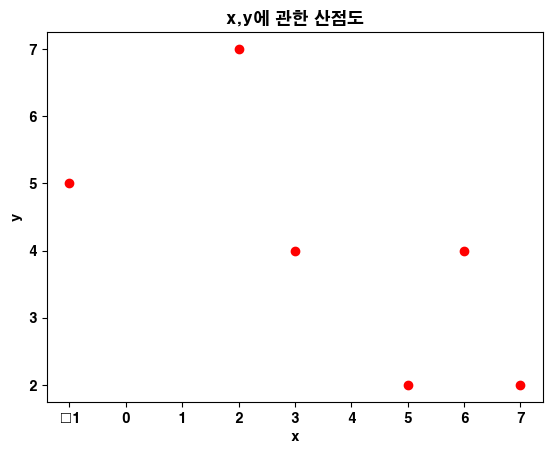

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name= font_manager.FontProperties(fname='C:\Windows\Fonts\H2GTRE.TTF').get_name()
rc('font',family=font_name)

x= np.array([-1,3,6,5,2,7])
y= np.array([5,4,4,2,7,2])

plt.figure()
plt.scatter(x,y, color= 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x,y에 관한 산점도')
plt.show()

#### (2) 표본상관계수를 구하라.

In [146]:
np.corrcoef(x,y)[0][1]

-0.6803091303374614

x와 y 사이에는 약간의 음의 상관관계가 있다고 할 수 있다

## 연습문제 5.10
다음은 흥분제의 양과 청각장애 지속시간을 제시하고 있다.

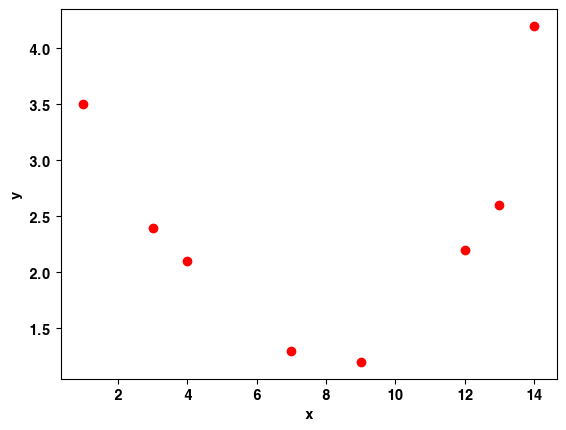

In [153]:
a= np.array([1,3,4,7,9,12,13,14])
b=np.array([3.5 ,2.4 ,2.1 ,1.3 ,1.2 ,2.2 ,2.6 ,4.2])


plt.figure()      #그림 그릴 도화지 생성
plt.scatter(a,b, color ='red')  #x에 a y에 b를 두고 점도표의 점은 빨간색
plt.xlabel('x')   #a축의 이름 x
plt.ylabel('y')   #b축의 이름 y

plt.show()


#### (1) 표본 상관계수를 구해라

In [157]:
# a와 b의 표본 상관 계수 구하기
np.corrcoef(a, b)[0, 1]

0.12674322847596553

#### (2)산점도를 그리고, 두 변수 간의 관계로부터 의미 없는 표본상관계수에 대해 논하라.

데이터의 상관계수가 -1또는 1에 수렴 할 수록 데이터의 분포가 선형의 모양을 띄며 두 변수가 직선관계에 있다고 말한다.
데이터의 상관계쑤가 0에 수렴 할 수록 데이터의 분포가 선형의 모습을 찾아 보기 힘드며 두 변수가 직서의 관계가 매우 약하다고 말한다.


따라서 위의 두 변수간의 상관계수를 보았을때 0에 거의 수렴하기때문에 두 변수 간에 직선의 관계가 매우 약하다 즉, 두 변수간 선형의 관계가 매우 약하다고 사료된다.

## 5.11 20개의 자료 (x,y)로부터 다음과 같은 수치가 계산되어 있다.

$\sum$x=156, $\sum$y=1178
<br>
$\sum$x^2=1262, $\sum$y^2=69390, $\sum$xy=9203


표본상관계수를 계산 하는 식은

Sxy/Sx^0.5 * Sy^0.5이다
<br>
x의 평균은 156/20=7.8
<br>
y의 평균은 1178/20=58.9

In [176]:
Sxy=9203-20*58.9*7.8
print(Sxy)

Sxx=1262-20*7.8**2
Sxx= Sxx**0.5
print(Sxx)
Syy= 69390-20*58.9**2
Syy= Syy**0.5
print(Syy)

R= Sxy/(Sxx*Syy)
print('표본상관계수= ',R)

14.600000000000364
6.723094525588648
2.408318915759063
표본상관계수=  0.9017157212720961


#### 표본상관계수가 1에 매우 근접한 상황임으로 두 자료 (x,y)는 매우 강한 양의 상관관계의 특성을 띄고 있으면 선형의 관계가 매우 강한 것으로 보여진다.